In [78]:
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import json
import os
import numpy as np
import pandas as pd
import re
%matplotlib inline

In [79]:
with open('./data_shifted/manifest.json') as file:
    manifest = json.load(file)

In [80]:
cases = manifest['cases'].keys()

In [81]:
def create_scan_with_ground_truth(scan, ground_truth, base_dir):
    contour_src = cv.imread(os.path.join(base_dir, ground_truth))
    scan = cv.imread(os.path.join(base_dir, scan))

    contour_src = cv.cvtColor(contour_src, cv.COLOR_RGBA2GRAY);
    _, contour_src = cv.threshold(contour_src, 120, 200, cv.THRESH_BINARY);
    contours, hierarchy = cv.findContours(contour_src, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE);
    contoured = cv.drawContours(scan, contours, -1, (0,255,0), 1);
    
    return contoured

In [82]:
data = []
index = []
for case in cases:
    scans = sorted(list(set(manifest['cases'][case]['scans'])))
    ground_truth = sorted(list(set(manifest['cases'][case]['ground_truth_masks'])))
    for scan, ground_truth in zip(scans, ground_truth):
        _, slice = re.findall('.*/scans\/(.*)\/(.*)\.png', scan)[0]
        
        data.append(create_scan_with_ground_truth(scan, ground_truth, './data_shifted/')) 
        index.append(case+'_'+slice)

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=3)

In [85]:
d = np.dstack(data)
r, c, f = d.shape

d = d.reshape((r*c, f))
d = np.rollaxis(d, 1, 0)

In [86]:
d.shape

(1329, 16384)

In [87]:
pca.fit(d)

PCA(n_components=3)

In [88]:
print(pca.explained_variance_ratio_)

[0.08604799 0.04996074 0.04104056]


In [89]:
X = pca.transform(d)

In [90]:
df = pd.DataFrame(X, columns=['pca0', 'pca1', 'pca2'])

<AxesSubplot:xlabel='pca0', ylabel='pca1'>

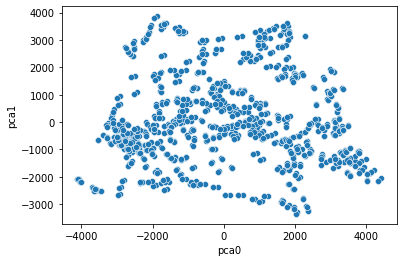

In [91]:
sns.scatterplot(data=df, x='pca0', y='pca1')

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

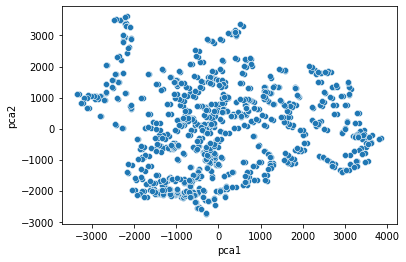

In [92]:
sns.scatterplot(data=df, x='pca1', y='pca2')

<AxesSubplot:xlabel='pca0', ylabel='pca2'>

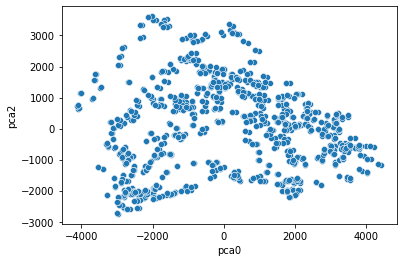

In [93]:
sns.scatterplot(data=df, x='pca0', y='pca2')